# install necessary library


In [1]:
pip install pycaret


In [2]:
 pip install scipy

In [3]:
!pip install kaggle

In [4]:
!mkdir /.kaggle
!mv kaggle.json /.kaggle
!mv /.kaggle /root/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle competitions download -c playground-series-s4e2

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [6]:
!unzip playground-series-s4e2.zip

unzip:  cannot find or open playground-series-s4e2.zip, playground-series-s4e2.zip.zip or playground-series-s4e2.zip.ZIP.


# import necessary library

In [43]:
import matplotlib
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pickle
from keras.utils import to_categorical
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import scipy
from sklearn.utils import class_weight
from pycaret.classification import *
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import dataset

In [8]:
data_train = pd.read_csv('/content/train2.csv')
data_test = pd.read_csv('/content/test2.csv')

In [9]:
data_train

,9.78E-01,9.26E-01,6.81E-01,2.45E-01,1.54E-01,1.91E-01,1.52E-01,8.58E-02,5.88E-02,4.90E-02,...,0.00E+00.79,0.00E+00.80,0.00E+00.81,0.00E+00.82,0.00E+00.83,0.00E+00.84,0.00E+00.85,0.00E+00.86,0.00E+00.87,0.00E+00.88
0,0.960,0.863,0.462,0.1970,0.0940,0.1250,0.0997,0.08830,0.0741,0.0826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000,0.659,0.186,0.0703,0.0703,0.0595,0.0568,0.04320,0.0541,0.0459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925,0.666,0.541,0.2760,0.1960,0.0773,0.0718,0.06080,0.0663,0.0580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967,1.000,0.831,0.5870,0.3570,0.2490,0.1460,0.08920,0.1170,0.1500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927,1.000,0.627,0.1930,0.0950,0.0725,0.0432,0.05350,0.0933,0.1900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19210,0.807,0.495,0.537,0.5300,0.4910,0.4840,0.4560,0.39600,0.2840,0.1370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
19211,0.718,0.605,0.487,0.3620,0.2320,0.1200,0.0517,0.00167,0.0000,0.0133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
19212,0.906,0.624,0.596,0.5760,0.5310,0.4820,0.4450,0.38800,0.3220,0.1920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
19213,0.858,0.646,0.846,0.2480,0.1670,0.1320,0.1220,0.12200,0.1190,0.1040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


# reset index of dataset

In [10]:
data_train.index, data_train.columns = [range(data_train.index.size), range(data_train.columns.size)]

In [11]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.960,0.863,0.462,0.1970,0.0940,0.1250,0.0997,0.0883,0.0741,0.0826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000,0.659,0.186,0.0703,0.0703,0.0595,0.0568,0.0432,0.0541,0.0459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925,0.666,0.541,0.2760,0.1960,0.0773,0.0718,0.0608,0.0663,0.0580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967,1.000,0.831,0.5870,0.3570,0.2490,0.1460,0.0892,0.1170,0.1500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927,1.000,0.627,0.1930,0.0950,0.0725,0.0432,0.0535,0.0933,0.1900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# visualization

In [12]:
classes=data_train.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [13]:
classes

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
2693,0.979,0.852,0.405,0.196,0.0893,0.0756,0.0515,0.0481,0.0344,0.0447,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5149,1.000,0.856,0.161,0.000,0.0722,0.1280,0.1780,0.2610,0.2500,0.2170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11051,0.928,1.000,0.928,0.891,0.8600,0.8330,0.8080,0.8100,0.6580,0.4070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
12712,1.000,0.930,0.679,0.362,0.1590,0.1310,0.1390,0.1160,0.0921,0.0848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
17231,0.987,0.764,0.425,0.155,0.0515,0.0215,0.0644,0.0558,0.0815,0.0429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


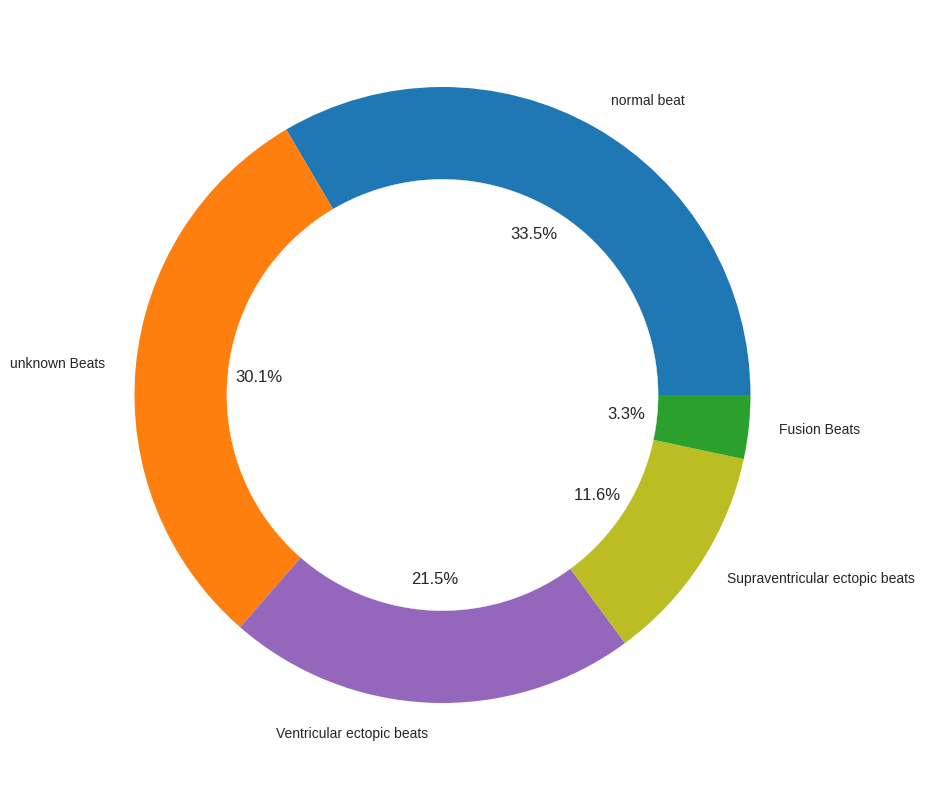

In [14]:
per_class = data_train[187].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

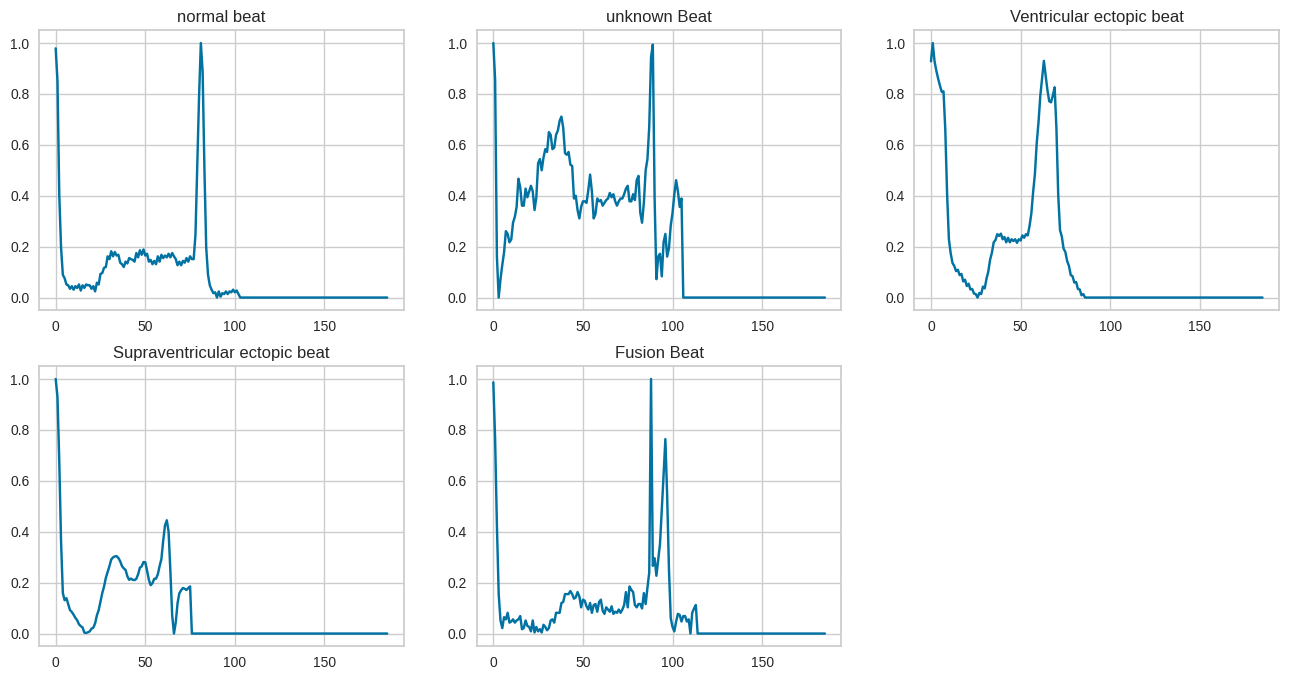

In [15]:
# plotting classes ECG
plt.figure(figsize=(16,8))
# normal
plt.subplot(2, 3, 1)
plt.plot(classes.iloc[0,:186])
plt.title('normal beat')
# unknown
plt.subplot(2, 3, 2)
plt.plot(classes.iloc[1,:186])
plt.title('unknown Beat')
# veb
plt.subplot(2, 3, 3)
plt.plot(classes.iloc[2,:186])
plt.title('Ventricular ectopic beat')
# seb
plt.subplot(2, 3, 4)
plt.plot(classes.iloc[3,:186])
plt.title('Supraventricular ectopic beat')
# fusion
plt.subplot(2, 3, 5)
plt.plot(classes.iloc[4,:186])
plt.title('Fusion Beat')
# show plot
plt.show()

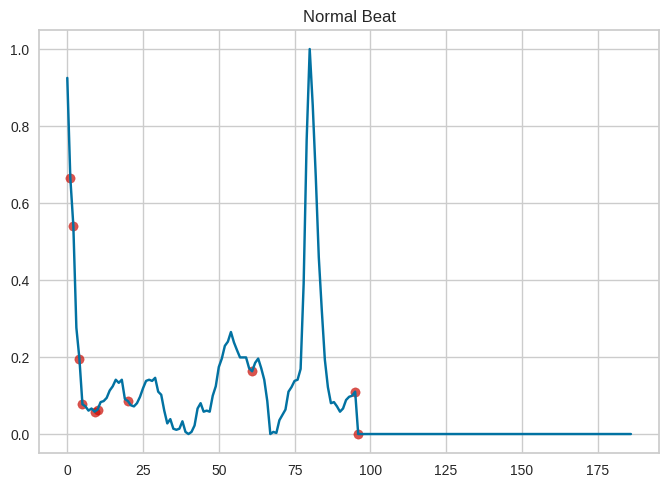

In [16]:
row2_values = data_train.iloc[2, :].tolist()
row2_values.pop()
columns = list(range(0, 187))
indices_to_highlight = [1, 2, 4, 5, 9, 10, 20, 61, 95, 96]
plt.plot(columns, row2_values, color='b')
plt.scatter(indices_to_highlight, [row2_values[i] for i in indices_to_highlight],
            color='r', s=45, alpha=0.7)
plt.title('Normal Beat')
plt.show()


# create features and label

In [17]:
X=data_train.iloc[:,:186].values
y=data_train.iloc[:,187].values

In [18]:
print(X.shape)
print(y.shape)

(19215, 186)
(19215,)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# use pycaret to train model

In [23]:
setup_data = setup(data=X_train, target=y_train, session_id=123)

# Compare different models using the specified cross-validation strategy
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(15372, 187)"
4,Transformed data shape,"(15372, 187)"
5,Transformed train set shape,"(10760, 187)"
6,Transformed test set shape,"(4612, 187)"
7,Numeric features,186
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9417,0.9954,0.9417,0.9430,0.9413,0.9205,0.9209,48.5730
xgboost,Extreme Gradient Boosting,0.9410,0.9954,0.9410,0.9415,0.9404,0.9195,0.9198,17.3720
et,Extra Trees Classifier,0.9382,0.9951,0.9382,0.9401,0.9378,0.9157,0.9162,2.2840
rf,Random Forest Classifier,0.9328,0.9944,0.9328,0.9358,0.9323,0.9083,0.9091,7.3300
knn,K Neighbors Classifier,0.9067,0.9794,0.9067,0.9081,0.9065,0.8729,0.8733,0.6720
gbc,Gradient Boosting Classifier,0.9048,0.0000,0.9048,0.9074,0.9041,0.8700,0.8707,143.7230
dt,Decision Tree Classifier,0.8706,0.9170,0.8706,0.8713,0.8707,0.8242,0.8243,1.8720
lr,Logistic Regression,0.8106,0.0000,0.8106,0.8134,0.8098,0.7411,0.7419,2.7030
svm,SVM - Linear Kernel,0.8017,0.0000,0.8017,0.8078,0.7984,0.7281,0.7311,1.4700
ridge,Ridge Classifier,0.7972,0.0000,0.7972,0.7990,0.7902,0.7202,0.7226,0.1610


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [24]:
xgboost=create_model('xgboost',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9480,0.9957,0.9480,0.9486,0.9477,0.9291,0.9293
1,0.9377,0.9946,0.9377,0.9391,0.9369,0.9149,0.9155
2,0.9391,0.9958,0.9391,0.9392,0.9384,0.9170,0.9173
3,0.9396,0.9961,0.9396,0.9406,0.9390,0.9175,0.9179
4,0.9396,0.9940,0.9396,0.9407,0.9393,0.9176,0.9179
Mean,0.9408,0.9952,0.9408,0.9416,0.9403,0.9192,0.9196
Std,0.0036,0.0008,0.0036,0.0035,0.0038,0.0050,0.0049


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
evaluate_model(xgboost)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [37]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(xgboost, open(filename, 'wb'))



In [38]:
new_data = pd.read_csv('/content/test2.csv')
X=new_data.iloc[:,:186].values
y=new_data.iloc[:,187].values


In [39]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X, y)
print(result)

0.9406645569620253


# now using Tab Transformer as a new method

The TabTransformer is a neural network architecture designed specifically for tabular data, which is data structured in rows and columns like in spreadsheets or SQL tables. This architecture leverages the Transformer model, originally developed for natural language processing tasks, to handle the complexities of tabular data. Here's a step-by-step explanation of the TabTransformer concept:

### 1. Understanding Tabular Data
Tabular data consists of rows and columns where:
- **Rows** represent individual data samples.
- **Columns** represent different features or attributes of the data.

For example, a table containing information about houses might have columns for the number of bedrooms, size in square feet, location, price, etc.

### 2. Traditional Approaches to Tabular Data
Traditionally, tabular data is processed using machine learning models such as decision trees, random forests, gradient boosting machines, or even simple linear models. These models often work well but may struggle to capture complex relationships between features without significant feature engineering.

### 3. Introduction to Transformers
Transformers are a type of neural network architecture that has been highly successful in natural language processing (NLP). They use a mechanism called **self-attention** to weigh the importance of different parts of the input data. The core idea is that each part of the input can attend to every other part, capturing complex dependencies.

### 4. Adapting Transformers for Tabular Data
The TabTransformer adapts the transformer architecture to handle tabular data by following these steps:

#### 4.1. Embedding Layer
Each feature (column) in the tabular data, especially categorical features, is embedded into a dense vector representation. This embedding transforms discrete categorical values into continuous vector spaces, making them suitable for neural network processing.

#### 4.2. Positional Encoding
Unlike sequences in NLP, tabular data does not have a natural ordering. Therefore, positional encoding is applied to the embeddings to inject information about the position of each feature.

#### 4.3. Transformer Layers
The core of the TabTransformer is the stack of transformer layers, which consist of:
- **Multi-Head Self-Attention:** This mechanism allows the model to focus on different parts of the input features simultaneously. Each head learns different aspects of the feature relationships.
- **Feedforward Neural Network:** After the attention mechanism, the data passes through a feedforward neural network to capture more complex patterns.
- **Layer Normalization and Residual Connections:** These help in stabilizing the training process and improving performance.

#### 4.4. Aggregation
After passing through several transformer layers, the representations of each feature are aggregated. This can be done using methods like concatenation or attention-based pooling, resulting in a single fixed-size vector representation of the entire row.

### 5. Final Prediction Layer
The aggregated vector representation is then passed to a final fully connected layer (or layers) that outputs the prediction. This can be a regression value for continuous targets or a probability distribution for classification tasks.

### 6. Training and Inference
- **Training:** The model is trained using backpropagation and gradient descent, optimizing a loss function appropriate for the task (e.g., mean squared error for regression, cross-entropy for classification).
- **Inference:** During inference, the trained model processes new rows of tabular data to make predictions.

### Benefits of TabTransformer
- **Captures Complex Feature Interactions:** The self-attention mechanism allows the model to learn complex relationships between features without explicit feature engineering.
- **Scalability:** Transformers can be scaled up with more layers and attention heads to improve performance.
- **Versatility:** Works well for a wide range of tabular data tasks, including both classification and regression.


In [40]:
data_train = pd.read_csv('/content/train2.csv')

In [41]:
X=data_train.iloc[:,:186].values
y=data_train.iloc[:,187].values

In [44]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class TabTransformer(nn.Module):
    def __init__(self, num_features, num_classes, dim_embedding=64, num_heads=4, num_layers=4):
        super(TabTransformer, self).__init__()
        self.embedding = nn.Linear(num_features, dim_embedding)
        encoder_layer = nn.TransformerEncoderLayer(d_model=dim_embedding, nhead=num_heads, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.classifier = nn.Linear(dim_embedding, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Adding a sequence length dimension
        x = self.transformer(x)
        x = torch.mean(x, dim=1)  # Pooling
        x = self.classifier(x)
        return x

# Define the number of features and classes based on your dataset
num_features = X_train_scaled.shape[1]
num_classes = len(np.unique(y_train))

# Initialize the model, loss, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TabTransformer(num_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Converting data to tensors
X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
y_train_tensor = torch.LongTensor(y_train).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)  # Assuming X_test_scaled is available
y_test_tensor = torch.LongTensor(y_test).to(device)          # Assuming y_test is available

# Training loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    print(f'Epoch {epoch}, Loss: {loss.item()}')



Epoch 0, Loss: 1.5918444395065308
Epoch 1, Loss: 1.2659121751785278
Epoch 2, Loss: 1.222137212753296
Epoch 3, Loss: 1.0661886930465698
Epoch 4, Loss: 1.0135713815689087
Epoch 5, Loss: 0.9415565729141235
Epoch 6, Loss: 0.9106834530830383
Epoch 7, Loss: 0.867569088935852
Epoch 8, Loss: 0.8189296126365662
Epoch 9, Loss: 0.7895951867103577
Epoch 10, Loss: 0.7625740766525269
Epoch 11, Loss: 0.7428988218307495
Epoch 12, Loss: 0.7307455539703369
Epoch 13, Loss: 0.7044199705123901
Epoch 14, Loss: 0.685097336769104
Epoch 15, Loss: 0.6711674332618713
Epoch 16, Loss: 0.6608575582504272
Epoch 17, Loss: 0.6391374468803406
Epoch 18, Loss: 0.621854305267334
Epoch 19, Loss: 0.6034854054450989
Epoch 20, Loss: 0.5840285420417786
Epoch 21, Loss: 0.5709754228591919
Epoch 22, Loss: 0.5610043406486511
Epoch 23, Loss: 0.5468366146087646
Epoch 24, Loss: 0.5264617800712585
Epoch 25, Loss: 0.5155056118965149
Epoch 26, Loss: 0.5034154057502747
Epoch 27, Loss: 0.4942261576652527
Epoch 28, Loss: 0.4831044375896454

In [46]:
# Evaluation
model.eval()
with torch.no_grad():
    test_output = model(X_test_tensor)
    test_loss = criterion(test_output, y_test_tensor)
    _, predicted = torch.max(test_output, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)

print(f'Test Loss: {test_loss.item()}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Test Loss: 0.2428167760372162
Test Accuracy: 92.27%


In [47]:
# Save the model
torch.save(model.state_dict(), 'tab_transformer_model.pth')


# test trained model on new data ( test data)

In [48]:

new_data = pd.read_csv('/content/test2.csv')
X=new_data.iloc[:,:186].values
y=new_data.iloc[:,187].values


# Preprocess the new data
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X)
new_data_tensor = torch.FloatTensor(X_new_scaled).to(device)
y_new_tensor = torch.LongTensor(y).to(device)




In [49]:
# Load the model
model = TabTransformer(num_features, num_classes).to(device)
model.load_state_dict(torch.load('tab_transformer_model.pth'))
model.eval()  # Set the model to evaluation mode


TabTransformer(
  (embedding): Linear(in_features=186, out_features=64, bias=True)
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (classifier): Linear(in_features=64, out_features=5, bias=True)
)

In [50]:
# Make predictions
with torch.no_grad():
    new_output = model(new_data_tensor)
    _, new_predictions = torch.max(new_output, 1)


In [51]:
# Calculate accuracy
correct = (new_predictions == y_new_tensor).sum().item()
total = y_new_tensor.size(0)
accuracy = correct / total

print(f'Accuracy on new data: {accuracy * 100:.2f}%')


Accuracy on new data: 88.63%
